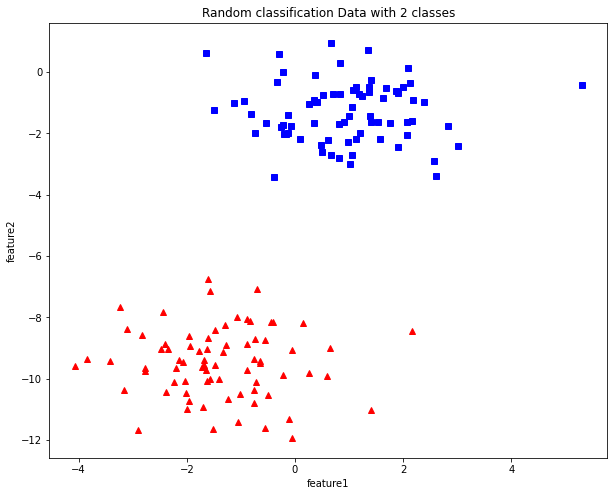

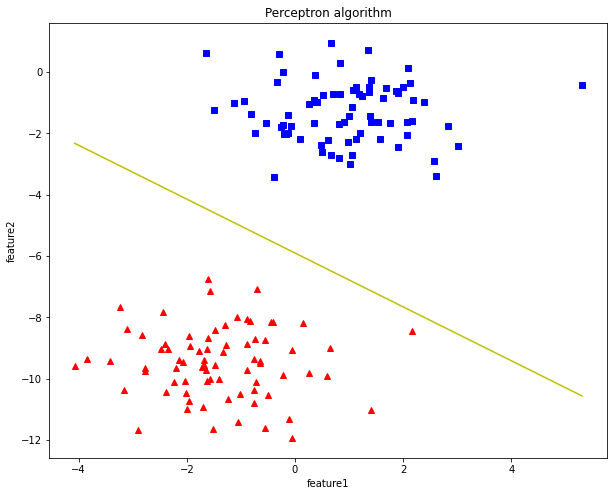

In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

fig = plt.figure(figsize=(10,8))
plt.plot(x[:, 0][y==0], x[:,1][y==0],'r^')
plt.plot(x[:, 0][y==1], x[:,1][y==1],'bs')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("Random classification Data with 2 classes")

def step_func(z):
    return 1.0 if (z>0) else 0.0

def perceptron(x,y,lr,epochs):
    m,n = x.shape
    theta = np.zeros((n+1,1))
    n_miss_list = []

    for epoch in range(epochs):
        n_miss = 0

        for idx,x_i in enumerate(x):
            x_i = np.insert(x_i,0,1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T,theta))
            if (np.squeeze(y_hat)-y[idx]) != 0:
                theta += lr*((y[idx]-y_hat)*x_i)
                n_miss += 1
        n_miss_list.append(n_miss)
    return theta, n_miss_list

def plot_decision_boundary(x,theta):
    x1 = [min(x[:,0]),max(x[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1+c
    fig = plt.figure(figsize=(10,8))
    plt.plot(x[:, 0][y==0], x[:,1][y==0],'r^')
    plt.plot(x[:, 0][y==1], x[:,1][y==1],'bs')
    plt.xlabel("feature1")
    plt.ylabel("feature2")
    plt.title("Perceptron algorithm")
    plt.plot(x1,x2,'y-')

theta,miss_l = perceptron(x,y,0.5,100)
plot_decision_boundary(x,theta)
